In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.colors import LogNorm

In [6]:
def get_density(u):
    
    data = np.genfromtxt( u, usecols=(0,1,2), names=['x', 'y', 'density'] )
    density = data['density']
    size = int(np.sqrt(density.size))
    dd = density.reshape((size,size))
    
    return dd

In [106]:
#data = np.genfromtxt( url, usecols=(1,2,4), names=['x', 'y', 'density'] )
numFrames = 67
urls = []
folder = ''

for i in range(numFrames):
    if i < 10:
        urls.append(folder + 'ouy00' + str(i))
    elif i < 100:
        urls.append(folder + 'ouy0' + str(i))
    else:
        urls.append(folder + 'ouy' + str(i))

dd = []
for i, u in enumerate(urls):
    if i%10==0: print("Processing...", np.round(i/numFrames*100,1), '%')
    dd.append(get_density(u))
print("Finished!")

Processing... 0.0 %
Processing... 14.9 %
Processing... 29.9 %
Processing... 44.8 %
Processing... 59.7 %
Processing... 74.6 %
Processing... 89.6 %
Finished!


<IPython.core.display.Javascript object>


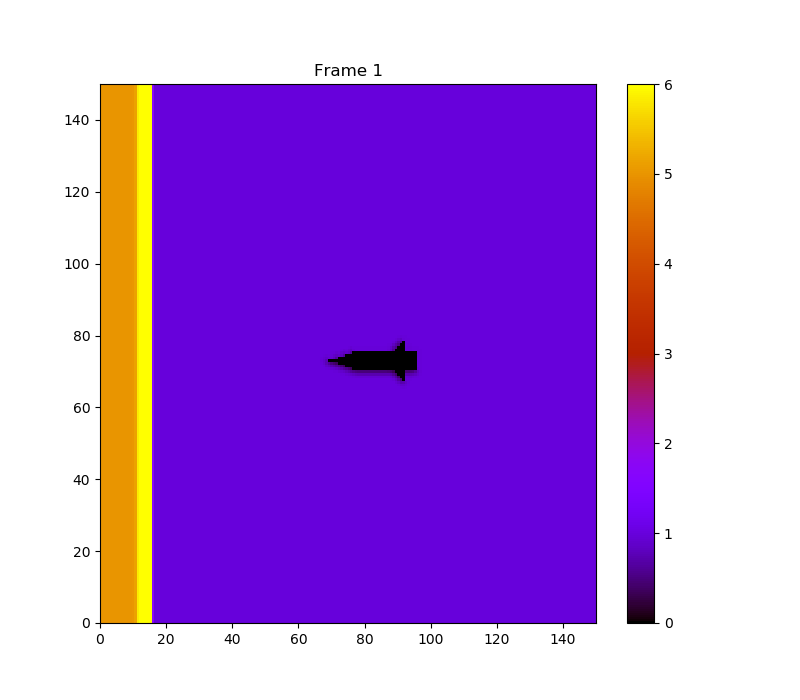

In [107]:
%matplotlib notebook
%matplotlib notebook

gridsize = int(np.sqrt(dd[0].size))

x = np.linspace(0, 150, gridsize)
y = np.linspace(0, 150, gridsize)
xx, yy = np.meshgrid(x, y)

fig, ax = plt.subplots()
cax = ax.pcolormesh(xx, yy, dd[0],
                    vmin=0, vmax=6,
                    #norm=LogNorm(vmin=1e-3, vmax=3),
                    cmap='gnuplot')
fig.colorbar(cax)
fig.set_size_inches(8, 7)
ax.set_title("Frame 0")

def animate_colourmesh(i, things, cax, ax):
    cax.set_array(np.ravel(things[i, :-1, :-1]))
    ax.set_title("Frame "+str(i))
    return cax,

line_ani = animation.FuncAnimation(fig, animate_colourmesh, numFrames, fargs=(np.array(dd), cax, ax),
                                   interval=150, blit=True);

# For local machine:
saving = False
if saving:
    plt.rcParams['animation.ffmpeg_path'] = 'D:\\Downloads\\ffmpeg-20180227-fa0c9d6-win64-static\\ffmpeg-20180227-fa0c9d6-win64-static\\bin\\ffmpeg.exe'
    FFwriter = animation.FFMpegWriter(fps=60)
    print("Saving")
    line_ani.save('hydrodynamics_code.mp4', writer=FFwriter, dpi=100)
    print("Saved")